In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import os
# import codecs

In [39]:
target_url = ("/Users/devkrroy/Dev/Projects/snow/data/export3.xlsx")
# target_url = ("C:/Dev/Projects/snow/data/export3.xlsx")

In [77]:
df = pd.read_excel(target_url)

In [78]:
df.info()
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95373 entries, 0 to 95372
Data columns (total 28 columns):
Number                95373 non-null object
Assignment_group      95373 non-null object
Priority              95373 non-null object
State                 95373 non-null object
Category              93947 non-null object
Subcategory           61328 non-null object
Severity              95373 non-null object
Closure_CI            94492 non-null object
Location              95079 non-null object
Close_code            94559 non-null object
Configuration_item    95373 non-null object
Child_Incidents       95373 non-null int64
Contact_type          95373 non-null object
Duration              95373 non-null int64
Impact                95373 non-null object
Short_description     95373 non-null object
Created               95373 non-null datetime64[ns]
dates                 95373 non-null datetime64[ns]
date                  95373 non-null datetime64[ns]
day                   95373 non-n

In [79]:
df.head()

,Number,Assignment_group,Priority,State,Category,Subcategory,Severity,Closure_CI,Location,Close_code,...,date,day,month,dom,week,week2,cluster,cluster1,cluster_name1,cluster_name
0,INC0406604,DHE-Command Center,4 - Low,Closed,Server,Windows,3 - Low,phx-vapp-689,Corporate Office - Phoenix 1,Resolved by Event,...,2018-09-01,Saturday,September,1,1,1,1,16,volume space,threshold set disk
1,INC0406605,DH-Enterprise IT Service Cntr,4 - Low,Closed,Security,NaN,3 - Low,Network Account Lock,St Mary's Medical Center San Francisco (SMMC-SF),Account Unlock,...,2018-09-01,Saturday,September,1,1,1,48,47,login,login
2,INC0406606,DHE-RCM-AppOp-Applications,3 - Moderate,Closed,Application,Revenue Cycle,3 - Low,Soarian DM,Corporate Office - Phoenix 1,Resolved by Event,...,2018-09-01,Saturday,September,1,1,1,44,7,login,cerner
3,INC0406607,DH-Enterprise IT Service Cntr,4 - Low,Closed,Security,NaN,3 - Low,Network Account Issue,Bruceville Terrace,Password Reset,...,2018-09-01,Saturday,September,1,1,1,4,4,login,login
4,INC0406608,DH-Enterprise IT Service Cntr,4 - Low,Closed,Application,Clinical,3 - Low,Clairvia,St Mary's Medical Center San Francisco (SMMC-SF),Password Reset,...,2018-09-01,Saturday,September,1,1,1,18,36,login,login


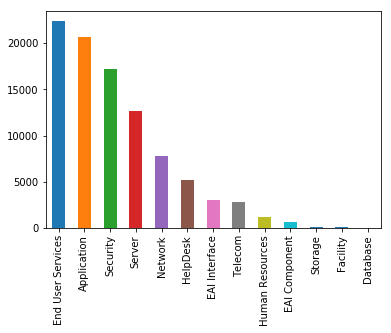

In [80]:
# plot few charts to understand the data

# Category by count - this should help understand "Number of Clusters" we should have

top_categories_df = df['Category'].value_counts()[:20]
top_categories_df.plot.bar(x = 'Category', y = 'Counts')


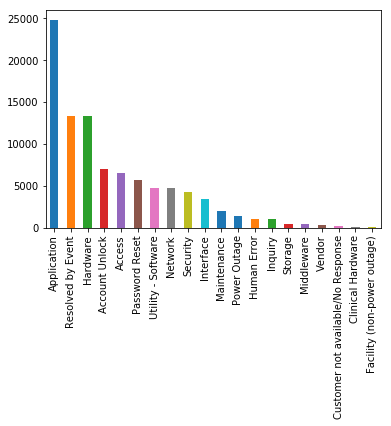

In [81]:
# Close_code by count 

top_close_code_df = df['Close_code'].value_counts()[:20]
top_close_code_df.plot.bar(x = 'Close_code', y = 'Counts')

In [82]:
# based on the 2 charts above we will go with 30 - 50 clusters of data

In [83]:
# identify the cols needed
cols = ['Number', 'Assignment_group', 'Priority', 'State', 'Category',
       'Subcategory', 'Severity', 'Closure_CI', 'Location', 'Close_code',
       'Configuration_item', 'Child_Incidents', 'Contact_type',
       'Duration', 'Impact', 'Short_description', 'Created']
df = df[cols]

In [84]:
# use less rows for analysis, remove later
# df = df.head(10000)
print('Shape of the modified dataframe ', df.shape)

Shape of the modified dataframe  (95373, 17)


In [85]:
# check for duplicate data
df[df['Short_description'].duplicated(keep = False)].sort_values('Short_description').head(5)

,Number,Assignment_group,Priority,State,Category,Subcategory,Severity,Closure_CI,Location,Close_code,Configuration_item,Child_Incidents,Contact_type,Duration,Impact,Short_description,Created
78573,INC0502480,DH-SC-EUS NLA NrthrdgRoscoe,4 - Low,Closed,Security,NaN,3 - Low,"McAfee AV, ASW or EPO",Corporate Office - Phoenix GAT,Security,"McAfee AV, ASW or EPO",0,Phone,98375,No Impact,"""Notification Text: AMCORE out of Date <Workstation>",2018-10-22 13:34:52
90835,INC0515090,DH-SW-EUS StRoseSanMartin,4 - Low,Closed,Security,NaN,3 - Low,McAfee Agent,Corporate Office - Phoenix GAT,Application,"McAfee AV, ASW or EPO",0,Phone,680806,No Impact,"""Notification Text: AMCORE out of Date <Workstation>",2018-10-29 13:55:41
90786,INC0515038,DH-SC-EUS Marian,4 - Low,Closed,Security,NaN,3 - Low,McAfee Agent,Corporate Office - Phoenix GAT,Middleware,"McAfee AV, ASW or EPO",0,Phone,69495,No Impact,"""Notification Text: AMCORE out of Date <Workstation>",2018-10-29 13:34:39
80023,INC0503977,DH-ClinApps HIM,4 - Low,Closed,Application,NaN,3 - Low,Cerner CPDI Kofax,Woodland Healthcare Davis,Application,Cerner Millennium Provider Doc 2015.01.19,0,Self-service,6784,Down for One IT Customer,Cerner CDI Work Queue Monitor - Not Receiving Faxes,2018-10-23 09:19:22
80137,INC0504096,DH-ClinApps HIM,4 - Low,Closed,Application,NaN,3 - Low,Cerner CPDI Kofax,Dignity Health Medical Group - Stockton,Application,Cerner Millennium HIM 2015.01.19,0,Self-service,4816,Down for One IT Customer,Cerner CDI Work Queue Monitor - Not Receiving Faxes,2018-10-23 09:51:46


In [86]:
# remove duplicates, we will still retain 1 row for analysis
df = df.drop_duplicates('Short_description')
print('Shape of the modified dataframe ', df.shape)

Shape of the modified dataframe  (61556, 17)


In [87]:
#Filter out some categories with instances < 50 for now , remove this filter in future
# df = df.groupby("Category").filter(lambda x: len(x) > 50)
# df = df.reset_index(drop = True)
df.Category.value_counts()

Application          15482
End User Services    14859
Security             11327
Network               6114
Server                5805
HelpDesk              2779
Telecom               1267
EAI Interface         1186
Human Resources       1022
EAI Component          294
Storage                117
Facility                99
Database                 2
Name: Category, dtype: int64

In [88]:
# nltk text preprocessing
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import contractions

# from nltk.tag import pos_tag

stop = stopwords.words('english')
lemmer = WordNetLemmatizer()

# extend stop words
# words like issue, problem, resolve, fix - do not add more sense to the description and are common
new_stopwords = ['chw','edu','phx','vapp', 'issue', 'issues', 'problem', 'problems', 
                 'resolve', 'resolved', 'fix', 'fixed', 'st', 'johns', 'regional', 'medical', 'center',
                'sjrmc', 'joseph', 'hospital', 'sjhmc', 'mercy', 'general', 'san juan', 'msjmc',
                'mgh', ]
stop.extend(new_stopwords)

# add punctuations to the stop words
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop.extend(punc)

# remove 'not' from the stop words - not defines the issue
# stop.remove('not')
        
# to be tried - apply text collocations

def pre_process(text):
        
    # try to capture the IPs    
    ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))')  
    ip = text.apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))
    
    text = text.apply(lambda x: ' '.join(word.lower() for word in x.split()))  # lower case
       
    text = text.apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))  # replace contractions
    
    # 'not able' is a common way to report issue, replace 'not able' with 'unable'
    # also not gets removed as part of stop words
    text = text.str.replace('not able', 'unable')
    text = text.str.replace('user id', 'user')
    text = text.str.replace('username', 'user')
    text = text.str.replace('st johns regional medical center', 'sjrmc')
    text = text.str.replace('st joseph hospital medical center', 'sjhmc')
    text = text.str.replace('mercy general hospital', 'mgh')
    text = text.str.replace('mercy san juan hospital', 'msjmc')
    text = text.str.replace('mercy hospital bakersfield', 'mhb')
    text = text.str.replace('mercy medical center redding', 'mmcr')
    text = text.str.replace('workstation on wheels', 'wow')
    
        
    # there are lot of places in the description where II (2 caps I) has been used as separator
    # this gets converted to small letter (ii) with high occurance, drop these letters
    text = text.str.replace(' ii ', ' ')  # replace with spaces
    
    # '/' or '\' are usually entered to separate words, word tokenize doesn't tokenize on these
    # replace them with spaces
    text = text.str.replace('[\/-]', ' ')  # replace with spaces
    
    # "'d": changes to " would", 'disk changes to wouldisk - unwanted contraction
    # replace wouldisk with disk
    text = text.str.replace('wouldisk', 'disk')  # replace with disk    
    
    # consider complete words that contain alpha
    alpha = re.compile(r'([A-Za-z/\-]*$)')
    text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if alpha.match(word)))
    
#     text = text.str.replace('[^A-Za-z ]', ' ')  # remove non words
    
    text = text.apply(lambda x: ' '.join([word for word in word_tokenize(x) if len(word) > 1 ]))  #length >1
    
    text = text.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in set(stop)]))   #stop
    text = text.apply(lambda x: ' '.join([lemmer.lemmatize(word, pos = 'v') for word in word_tokenize(x)]))       #lemma

    return (text, ip)
    
normalized = pre_process(df['Short_description'])

In [89]:
pd.options.display.max_colwidth = 100

In [90]:
print(normalized[0][:20])

0              utilization threshold set disk file system percent full
1                                       account lock unable login user
2                                                                     
3                                               network password reset
4                clairvia unable login password reset hduv do jmoyrong
5                       network account lock unable login user jyongco
6                          error message appear open clpdayend qrgxmsg
7                           wow display leave monitor upside device id
8                                        cpu utilization threshold set
9                                            receive clpdayend qclxerr
10                                       cpu utilization threshold set
11                                       cpu utilization threshold set
12           medseries tier host ipaddress listen port charge multiple
13                                          master dsc syslog critical
14    

In [91]:
print(normalized[1][:20])

0                phx-vapp-689.chw.edu
1                                    
2                        PHX-VAPP-408
3                                    
4                                    
5                                    
6                                    
7                       10.203.212.24
8                phx-vapp-842.chw.edu
9                                    
10               phx-vapp-237.chw.edu
11               phx-vapp-238.chw.edu
12                      -10.248.84.17
13    CHW-as1-2central-dsc 10.1.5.100
14     CHW-as2-2central-dsc 10.1.5.10
15                phx-app-040.chw.edu
16                phx-app-034.chw.edu
17                                   
18                    phxdc23c-nas-07
19         CHW-as1-2west-dsc 10.1.5.6
Name: Short_description, dtype: object


In [92]:
print(normalized[0].apply(lambda x: x == '').sum())

453


In [93]:
# there are 459 cells with no terms, this isn't significant in total of 95373, lets live with it for now

In [94]:
# test results using word_tokenize
from nltk.tokenize import word_tokenize

normalized[0][:20].apply(word_tokenize)

0                 [utilization, threshold, set, disk, file, system, percent, full]
1                                             [account, lock, unable, login, user]
2                                                                               []
3                                                       [network, password, reset]
4                   [clairvia, unable, login, password, reset, hduv, do, jmoyrong]
5                           [network, account, lock, unable, login, user, jyongco]
6                               [error, message, appear, open, clpdayend, qrgxmsg]
7                               [wow, display, leave, monitor, upside, device, id]
8                                               [cpu, utilization, threshold, set]
9                                                    [receive, clpdayend, qclxerr]
10                                              [cpu, utilization, threshold, set]
11                                              [cpu, utilization, threshold, set]
12  

In [95]:
# add the processed text and extracted ips to dataframe
df['Terms'] = normalized[0]
df['IPs'] = normalized[1]

In [96]:
# drop the rows where 'Terms' column is spaces
df = df[df['Terms'] != '']

In [97]:
# this cell is just for testing regex
# import re

# print(re.split('[:\' ]', '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85\''))

# ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))') 

# print(ip_pattern.match('phx-vapp-238.chw.edu'))
# print(ip_pattern.match('CPU Utilization is '))
# print(ip_pattern.match('85.2'))
# print(ip_pattern.match('10.250.243.2'))
# print(ip_pattern.match('-10.248.84.17'))
# print(ip_pattern.match('192.168.2.85)'))
# print(ip_pattern.match('10.1.5.100'))


# test = pd.DataFrame({'strings': ['...', 'a(b$c']})
# test.strings.str.replace('[^a-zA-Z ]', ' ')

# print('This is a test in spite.'.split())
# print(lemmer.lemmatize('acknowledgement', pos='v'))

# alpha = re.compile(r'([A-Za-z/\-]*$)')

# dk = pd.DataFrame({'sentences': ['This is a very MS4 ABCD901 \'abc.xyz.109.01\' good site. I will recommend it to others.', 
#                                  'Can you please give me a call at 9983938428. have issues with the listings.', 
#                                  'WOW / Workstation on Wheels || WOW / Workstation on Wheels Issue',
#                                  '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85',
#                                  'Clairvia/not able to login//password reset hduv done jmoyrong/issue resolved',
#                                  'God is Great/I won a lottery.',
#                                  'CIM_2_BAYDSC19_MSFCHGX:MSF19CHGX:MedSeries 4:TIER-2 P05:DESTINATION_REALTIME:No host at ipAddress -10.248.84.17, listening on port -21529. :Charges - Multiple t',
#                                  'Account Lock ||  Not able to login || user id-adeperalta001',
#                                  'good work! keep it up, couldn\'t able to login, couldn\'t connect']})

# dk['tokenized_sents']  = dk['sentences'].apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))



# dk['tokenized_sents'] = dk['sentences'].apply(lambda x: ' '.join(word.lower() for word in x.split()))  # lower case
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))  # replace contractions

# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('not able', 'unable')
# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('[\/-]', ' ')  # replace them with spaces

# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if alpha.match(word)))
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([lemmer.lemmatize(word, pos='v') for word in word_tokenize(x)]))       #lemma
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in set(stop)]))   #stop

# print(dk['tokenized_sents'])

In [98]:
# define a tokenizer which returns the set of tokens in the text that it is passed
"""
def tokenize_only(text):
    # tokenize by  word 
    tokens = [word.lower() for word in nltk.word_tokenize(text) ]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens
"""    

"\ndef tokenize_only(text):\n    # tokenize by  word \n    tokens = [word.lower() for word in nltk.word_tokenize(text) ]\n    filtered_tokens = []\n    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)\n    for token in tokens:\n        if re.search('[a-zA-Z]', token):\n            filtered_tokens.append(token)\n    return filtered_tokens\n"

In [99]:
# view the terms column just before feature extraction
df['Terms'][0:20]

0              utilization threshold set disk file system percent full
1                                       account lock unable login user
3                                               network password reset
4                clairvia unable login password reset hduv do jmoyrong
5                       network account lock unable login user jyongco
6                          error message appear open clpdayend qrgxmsg
7                           wow display leave monitor upside device id
8                                        cpu utilization threshold set
9                                            receive clpdayend qclxerr
10                                       cpu utilization threshold set
11                                       cpu utilization threshold set
12           medseries tier host ipaddress listen port charge multiple
13                                          master dsc syslog critical
14                                                 dsc syslog critical
15    

In [100]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=10000, max_df=0.8, min_df=0.0005,                                  
#                                   use_idf=True, tokenizer=word_tokenize, ngram_range=(1,3))

vectorizer = TfidfVectorizer(max_features = 5000,                                  
                                  use_idf = True, tokenizer = word_tokenize, stop_words = stop, ngram_range = (1,1))

%time X = vectorizer.fit_transform(df['Terms'].values)

print(X.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 6.7 s, sys: 12 ms, total: 6.72 s
Wall time: 6.71 s
(61103, 5000)


In [101]:
features = vectorizer.get_feature_names()
freq = sum(X).toarray()[0]
df_features = pd.DataFrame(freq, index = features, columns = ['frequency'])

# sort the terms in descending order of frequency
df_features.sort_values(by = ['frequency'], inplace = True, ascending = False)

In [102]:
# print the top 50 occurances - help decide the possible clusters
print(df_features[0:50])

               frequency
user         3505.756325
unable       3497.266605
login        3222.885170
network      2781.368476
account      2566.143416
id           1828.005611
password     1764.509203
reset        1491.678718
need         1336.985842
lock         1323.847055
device       1113.418961
dev          1059.358861
status        971.464661
mdf           966.776428
cerner        948.892802
printer       934.862394
error         918.601921
job           883.681519
main          858.470997
access        857.809281
set           819.029158
able          784.946744
work          768.073353
threshold     765.326679
file          762.192973
utilization   758.661513
unlock        753.896434
computer      748.870424
hduv          730.774407
desktop       720.154659
smart         702.979859
system        694.590361
duo           688.738384
xl            661.514505
rt            659.481828
full          623.065514
complete      621.326742
disk          604.839643
launch        591.139560


In [103]:
# print the last 20 occurances - terms with low frequency
# how low is the frequency? do we have correct number of features
print(df_features.tail(20))

               frequency
vis             0.739950
vadim           0.738858
taskscheduler   0.734558
omt             0.733873
transcriptio    0.727780
temporarily     0.725249
teleradiology   0.722217
institution     0.717826
stfrancis       0.717826
huggins         0.717821
intent          0.706421
warm            0.704889
various         0.704654
ipa             0.695992
ttype           0.641260
synonym         0.604346
nvnlv           0.589064
nvbd            0.588388
httpd           0.555160
httpserver      0.528688


In [104]:
print(features[100:200])

['agree', 'agreement', 'ahu', 'ahwatukee', 'aid', 'aio', 'air', 'airpark', 'airplane', 'akirsl', 'akirsw', 'al', 'alaris', 'alarm', 'alcove', 'alert', 'alfa', 'aliacnsmmm', 'alias', 'aliborio', 'align', 'alignment', 'alive', 'allen', 'allergies', 'allergy', 'allocate', 'allocation', 'allow', 'allscript', 'allscripts', 'alm', 'almost', 'almut', 'alot', 'already', 'also', 'alt', 'alternate', 'always', 'amanda', 'amanpal', 'amatula', 'amb', 'ambassador', 'amber', 'ambulatory', 'amcore', 'america', 'amicas', 'amonroycruz', 'amy', 'ana', 'analysis', 'analyst', 'analytics', 'analyzer', 'anc', 'ancillary', 'anderson', 'andrea', 'andrew', 'android', 'anesthesia', 'angel', 'angela', 'angelscamp', 'anisha', 'ann', 'anna', 'anne', 'annual', 'another', 'answer', 'anthony', 'antivirus', 'anuh', 'anyconnect', 'anymore', 'anyone', 'anything', 'anywhere', 'aobannon', 'ap', 'apache', 'apanameno', 'apart', 'apc', 'apex', 'aphuynh', 'api', 'app', 'appbar', 'appdev', 'appear', 'appl', 'applauncher', 'appl

In [105]:
# using elbow method to find optimum number of clusters - start with 30 clusters

# from sklearn.cluster import KMeans
# wcss = []

# for i in range(30, 51):
#     km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 1)
#     km.fit(X)
#     wcss.append(km.inertia_)
 
# optimal_clusters = np.argmin(wcss) + 2 # As argmin return the index of minimum loss.

# plt.plot(range(30, 51), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# print ("The optimal number of clusters obtained is - ", optimal_clusters)
# print ("The loss for optimal cluster is - ", min(wcss))

In [106]:
num_clusters = 50

# KMeans
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
# %time y = kmeans.fit_predict(X)
# %time kmeans.fit(X)

# Mini Batch KMeans
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters = num_clusters, init = 'k-means++', 
                         max_iter = 300, n_init = 3, random_state = 1)
%time kmeans.fit(X)

# clusters = kmeans.labels_.tolist()

CPU times: user 1.12 s, sys: 5.79 ms, total: 1.13 s
Wall time: 1.13 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=300, max_no_improvement=10, n_clusters=50,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [107]:
# df['Cluster'] = pd.DataFrame(y, columns = ['Cluster'])
df['Cluster'] = kmeans.labels_

In [108]:
print(df.loc[:10,['Terms', 'Cluster']])

                                                      Terms  Cluster
0   utilization threshold set disk file system percent full        5
1                            account lock unable login user       28
3                                    network password reset       18
4     clairvia unable login password reset hduv do jmoyrong       37
5            network account lock unable login user jyongco       28
6               error message appear open clpdayend qrgxmsg        9
7                wow display leave monitor upside device id       10
8                             cpu utilization threshold set        0
9                                 receive clpdayend qclxerr        9
10                            cpu utilization threshold set        0


In [109]:
# Save cluster in pickle file for future use
# import pickle

# pickle.dump(km, open('pkl/km_1.pkl', 'wb'))

In [110]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-51:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))

0 : cpu, utilization, threshold, set, error, pm, viis, medbg, vprt, app, medps, vora, vint, medarc, sql, medfs, vsql, memory, use, pcn, script, syngo, svuserapp, sdm, utl, sm, vctx, pvuserapp, csm, ppps, vaio, physical, dvd, icbr, vfax, dvidmi, pidm, ptr, pacs, startup, repair, dep, request, windows, play, receiveack, node, tcpip, condition, desktop
1 : duo, need, user, enroll, activation, enrollment, nfuse, enrol, unable, register, link, login, activate, send, phone, number, want, code, account, call, access, application, guide, name, assistance, ph, require, mobile, step, new, reactivate, add, device, get, customer, verification, reactivation, setup, email, two, help, passcode, security, use, id, remote, change, logon, registration, able
2 : encryption, login, unable, user, mcafee, drive, laptop, password, credentials, id, generic, ask, desktop, recovery, boot, able, sync, dev, stick, time, perform, log, use, one, screen, error, past, endpoint, mde, default, unknown, logon, network, 

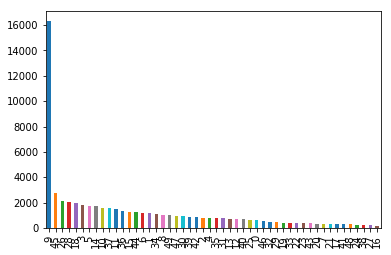

In [111]:
# lets analyze the clusters
top_clusters = df['Cluster'].value_counts()
top_clusters.plot.bar(x = 'Cluster', y = 'Counts')

In [112]:
# there is high volume for cluster 9, lets look at few to investigate
print(df[df.Cluster == 9].iloc[:10, [15,17,18,19]])

                                                                                      Short_description  \
6   PHXASP03 RPG1216 Error message CPF4128 appeared during OPEN (C S D F). CASH_ADJS  CLPDAYEND  626...   
9   PHXASP03 CPA0701 RPG9001 received by PHCL1956 at 2100. (C D I R) CASH_ADJS  CLPDAYEND  626868 QC...   
13                          MASTER // nmscust02-2 : CHW-as1-2central-dsc : 10.1.5.100 : Syslog Critical   
14                                     nmscust02-2 : CHW-as2-2central-dsc : 10.1.5.10 : Syslog Critical   
17                                                   MEDITECH ALERT (HIGH)                                
18  Volume Space Nearly Full warning event on phxdc23c-nas-07:/crh1a_sleeplabs_cifs01 (Volume Space ...   
19                                         nmscust02-2 : CHW-as1-2west-dsc : 10.1.5.6 : Syslog Critical   
24  CIM_2_MCD95_HCLORDL:HCL99ORDL:HCCL:TIER-2:DESTINATION_REALTIME:Try 1 to receive the response fro...   
28  CIM_2_BAYDSC19_OMNADT:OMN19ADT:Om

In [231]:
# Create mapping of ngram features into clusters, 
# save into terms map object with key as cluster name (first feature in each cluster - with 2 words)
# terms = top 20 ngram features

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
df_features_map = pd.DataFrame(index = np.arange(0, num_clusters), columns=['features','key'])    

for i in range(num_clusters):
    list = [] 
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end=',')
        list.append(terms[ind])
    for ind2 in order_centroids[i, :1]:
        terms_map.key.loc[i] = terms[ind2]

    str = ', '.join(list) 
    terms_map.terms.loc[i] = str
    print()
print(terms_map.shape)

df_features = pd.DataFrame(freq, index = features, columns = ['frequency'])

# sort the terms in descending order of frequency
df_features.sort_values(by = ['frequency'], inplace = True, ascending = False)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
terms_map = pd.DataFrame(index=np.arange(0, num_clusters),columns=['terms','key'])    
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    #terms_map['key'] = i
    list = [] 
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end=',')
        list.append(terms[ind])
    for ind2 in order_centroids[i, :1]:
        terms_map.key.loc[i] = terms[ind2]

    str = ', '.join(list) 
    terms_map.terms.loc[i] = str
    print()
print(terms_map.shape)

Cluster 0: reset, password, reset user name, account password, account password reset, password reset user, reset user, hduv, user name, name, reset password, hduv reset, user name hduv, name hduv, password reset, network account password, user, account, hduv reset password, network,
Cluster 1: cpu utilization threshold, cpu utilization, cpu, threshold set, utilization threshold, utilization, utilization threshold set, set, threshold, medps cpu utilization, medps, medps cpu, vint, vint cpu, vint cpu utilization, viis cpu utilization, viis cpu, app cpu utilization, app cpu, viis,
Cluster 2: printer, device, login, wheel, workstation wheel, workstation, wow workstation, wow workstation wheel, reboot, wow, device reboot, mdf, status, power, file, application, sjpvh, power supply, supply, sjpvh device,
Cluster 3: error, error error, mft error, mft, tier mft, tier mft error, mft error error, tier, sftp, error error unable, error unable, suite, suite tier, error unable connect, millennium, m